<a href="https://colab.research.google.com/github/RaghavDabra/medical-predictions-/blob/main/medical_insurance_prediction_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Cost Insurance Prediction




# New Section

## Dataset

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0,9.0)

**Importing Dataset**

In [3]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


**Describe**

In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
##Value counts for every columns
for column in df.columns:
    print(df[column].value_counts())
    print('*' * 20)

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64
********************
male      676
female    662
Name: sex, dtype: int64
********************
32.300    13
28.310     9
31.350     8
30.800     8
30.875     8
          ..
20.100     1
29.545     1
37.900     1
25.520     1
24.090     1
Name: bmi, Length: 548, dtype: int64
********************
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
********************
no     1064
yes     274
Name: smoker, dtype: int64
********************
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, 

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Visualization

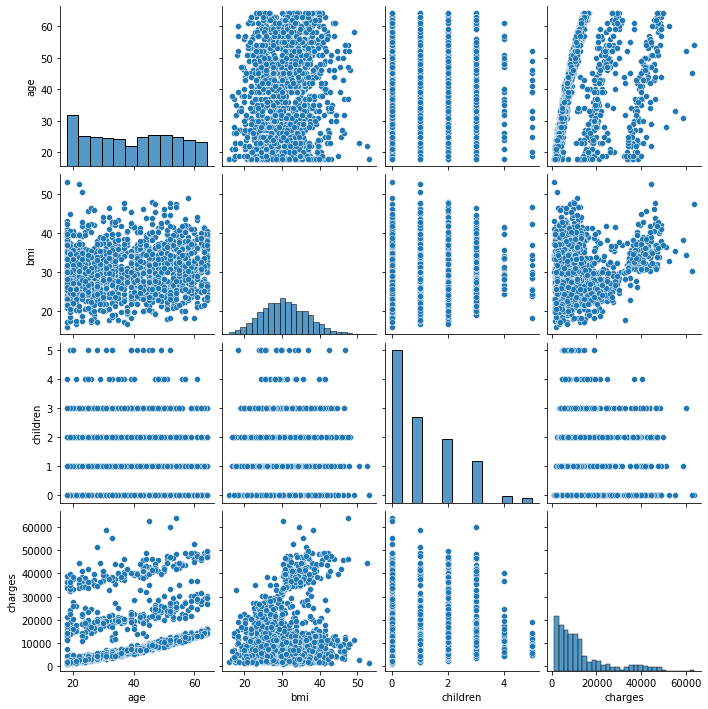

In [9]:
sns.pairplot(df)

**Finding correlation between Age and Charges by ploting a scatter plot.**

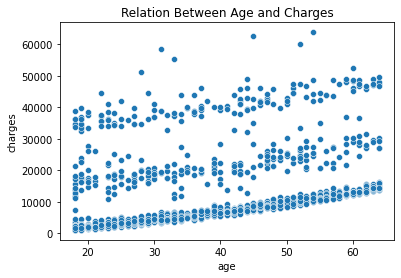

In [10]:
plt.title('Relation Between Age and Charges')
sns.scatterplot(x = df['age'], y= df['charges'])
plt.show()

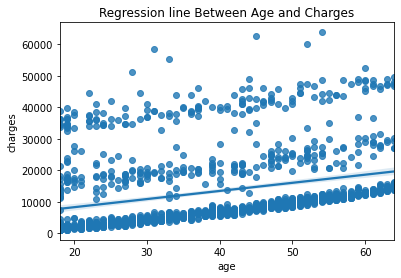

In [11]:
plt.title('Regression line Between Age and Charges')
sns.regplot(x = df['age'], y= df['charges'])
plt.show()

There is a positive relation between Age and Charges

**Finding correlation between BMI and Charges by ploting a scatter plot**


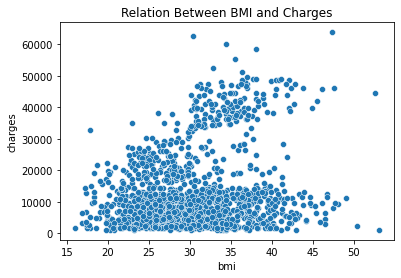

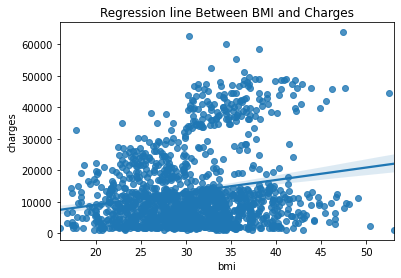

In [12]:
plt.title('Relation Between BMI and Charges')
sns.scatterplot(x = df['bmi'], y= df['charges'])
plt.show()
plt.title('Regression line Between BMI and Charges')
sns.regplot(x = df['bmi'] , y = df['charges'])
plt.show()

There is a postive relation between Bmi and Charges as we can see it from the regression line


**Finding correlation between Smokers and Charges by ploting a scatter plot and swarmplot**

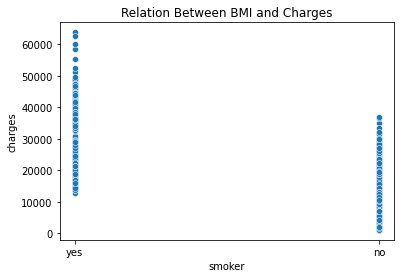

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


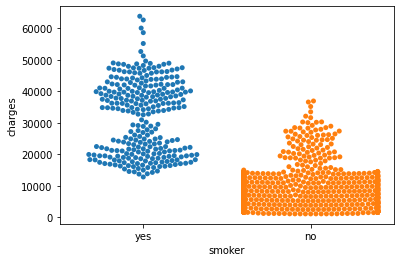

In [13]:
plt.title('Relation Between BMI and Charges')
sns.scatterplot(x = df['smoker'], y= df['charges'])
plt.show()
sns.swarmplot(x=df['smoker'],y = df['charges'] )

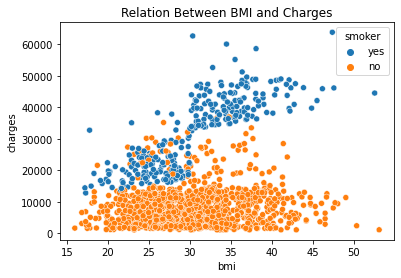

In [14]:
plt.title('Relation Between BMI and Charges')
sns.scatterplot(x = df['bmi'], y= df['charges'] , hue = df['smoker'])
plt.show()

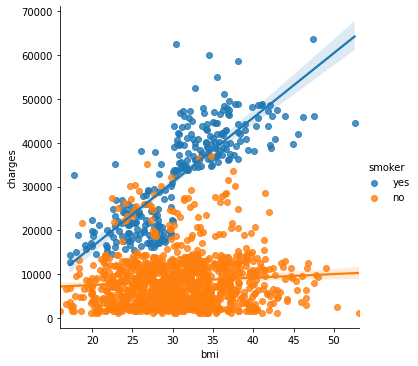

In [15]:
sns.lmplot(x = 'bmi',y = 'charges', hue = 'smoker' , data=df)

As we can see from the plots, smoker tends to pay more charges than non smoker.
The slope of the regression line of smoker is more steeper than the slope of the non smoker

**Finding correlation between Children and Charges by ploting a barplot**


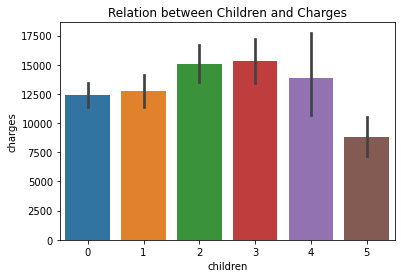

In [16]:
plt.title('Relation between Children and Charges')
sns.barplot(x=df['children'], y=df['charges'])

From the plot we can see people having 2 or 3 childs has more charges.

**Finding correlation between Sex and Charges**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


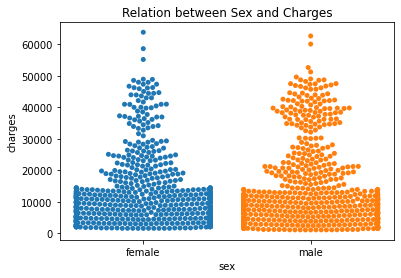

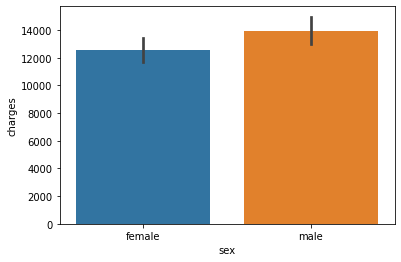

In [17]:
plt.title('Relation between Sex and Charges')
sns.swarmplot(x = df['sex'] , y = df['charges'])
plt.show()
sns.barplot(x = df['sex'], y = df['charges'])
plt.show()

 There is not much difference between cost paid by mail and female. Thus sex of the person does not necessarily determine the insurance charges one pays.Either I can delete it or keep it

**Finding correlation between Region and Charges by ploting a barplot plot**

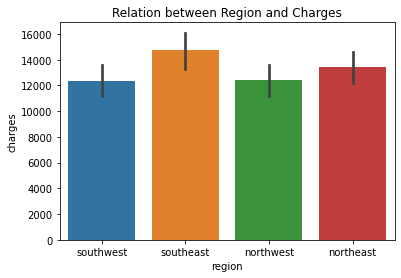

In [18]:
plt.title('Relation between Region and Charges')
sns.barplot(x=df['region'], y=df['charges'])
plt.show()

**Final Corelation plot**


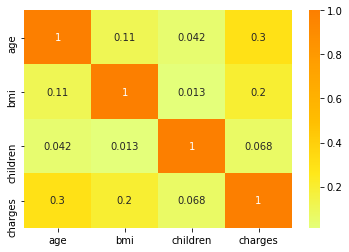

In [19]:
sns.heatmap(df.corr() , cmap = 'Wistia' , annot = True)

## Data Preprocessing

**Checking the missing values**

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in the dataset

**Seeing the missing values in the heatmap**

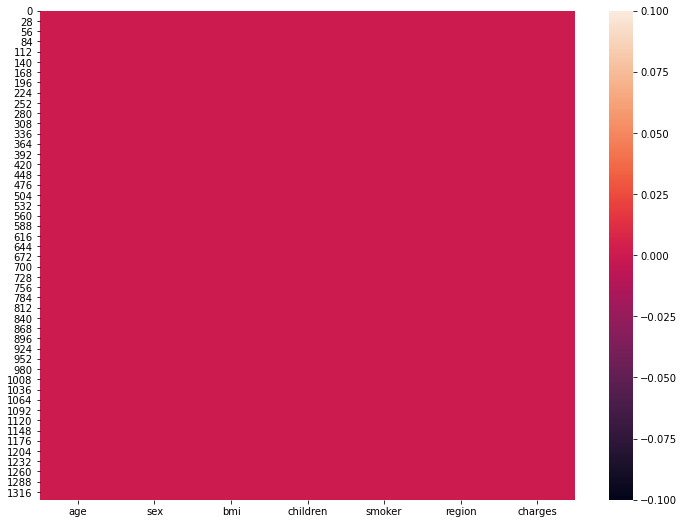

In [ ]:
sns.heatmap(df.isnull())

**Seeing the percentage of missing values**

In [ ]:
missing_val_per = (df.isnull().sum() / df.shape[0] ) * 100
missing_val_per

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

**Outlier Detection using Z-Score Method**

In [ ]:
def outlier_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3.5
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    print(outliers)
    return len(outliers), outliers

In [ ]:
## Checking whether age column has any outlier

In [ ]:
age_outliers_number, age_outliers = outlier_zscore(df.age)

[]


In [ ]:
print(f"The number of outliers are {age_outliers_number} and the outliers are {age_outliers}")

The number of outliers are 0 and the outliers are []


In [ ]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

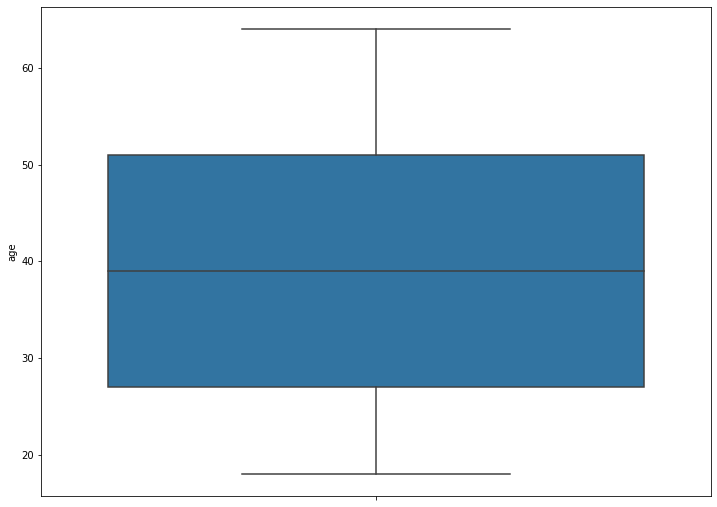

In [ ]:
sns.boxplot(y = 'age', data = df)

Thus there is no outlier in the age column

In [ ]:
## Checking whether bmi column has any outlier

In [ ]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [ ]:
bmi_outliers_number, bmi_outliers = outlier_zscore(df.bmi)

[52.58, 53.13]


In [ ]:
print(f"The number of outliers are {bmi_outliers_number} and the outliers are {bmi_outliers}")

The number of outliers are 2 and the outliers are [52.58, 53.13]


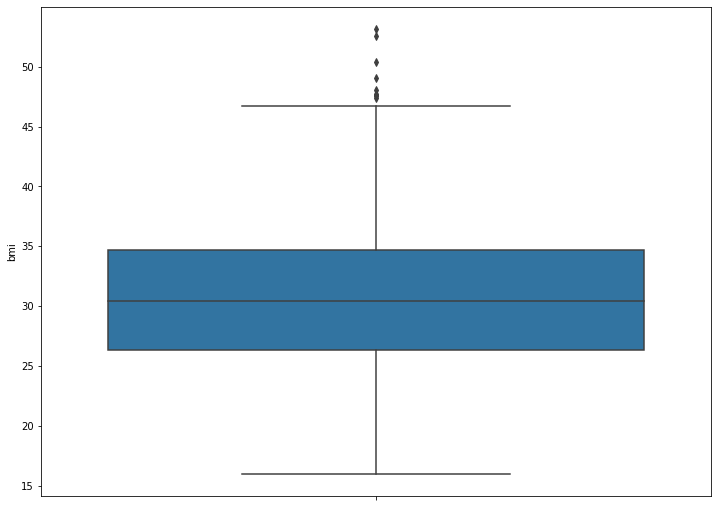

In [ ]:
sns.boxplot(y = 'bmi', data = df)

In [ ]:
#Removing the outliers of bmi 
for num, i in enumerate(df['bmi']):
    if i in bmi_outliers:
        df['bmi'][num] = 48.5


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
bmi_outliers_number, bmi_outliers = outlier_zscore(df.bmi)

[]


In [ ]:
print(f"And now the number of outliers are {bmi_outliers_number}")

And now the number of outliers are 0


In [ ]:
df['bmi'].describe()

count    1338.000000
mean       30.656887
std         6.076756
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        50.380000
Name: bmi, dtype: float64

In [ ]:
## Checking whether children column has any outlier

In [ ]:
df['children'].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [ ]:
chil_outliers_number, chil_outliers = outlier_zscore(df.children)


[]


In [ ]:
print(f"The number of outliers are {bmi_outliers_number} and the outliers are {bmi_outliers}")

The number of outliers are 0 and the outliers are []


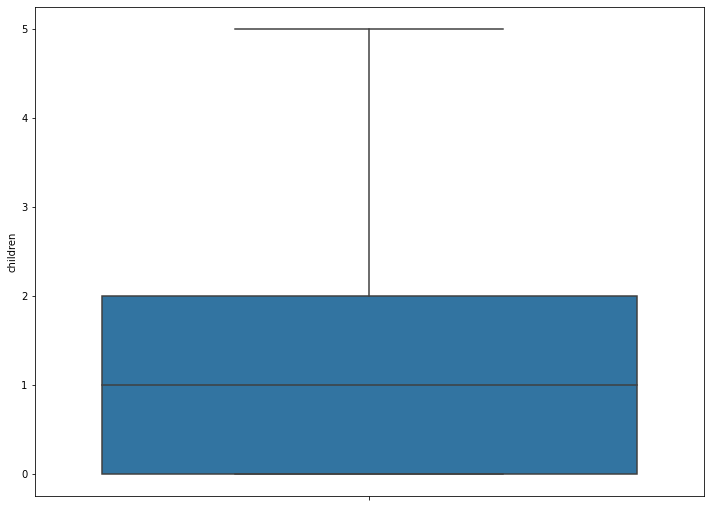

In [ ]:
sns.boxplot(y = 'children', data = df)

In [ ]:
## Checking whether children column has any outlier

In [ ]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [ ]:
charges_outliers_number, charges_outliers = outlier_zscore(df.charges)

[63770.42801, 58571.074479999996, 60021.39897, 62592.87309]


In [ ]:
print(f"The number of outliers are {charges_outliers_number} and the outliers are {charges_outliers}")

The number of outliers are 4 and the outliers are [63770.42801, 58571.074479999996, 60021.39897, 62592.87309]


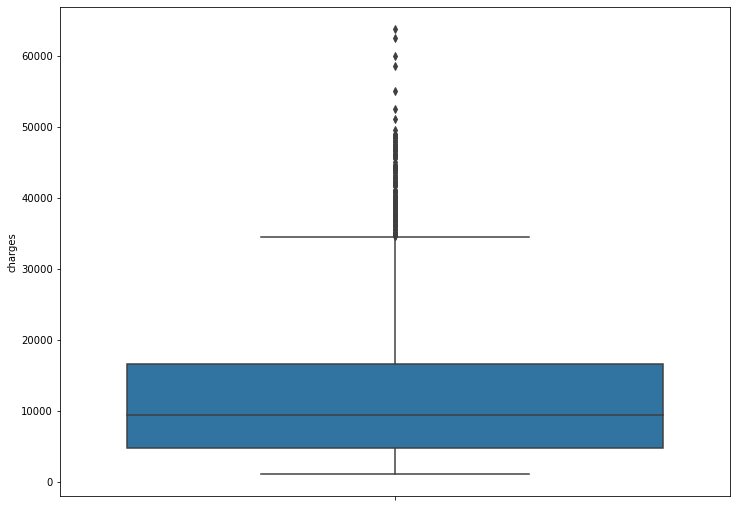

In [ ]:
sns.boxplot(y = 'charges', data = df)

In [ ]:
#Removing the outliers of bmi 
for num, i in enumerate(df['charges']):
    if i in charges_outliers:
        df['charges'][num] = 55000.00000

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
charges_outliers_number, charges_outliers = outlier_zscore(df.charges)

[]


In [ ]:
print(f"And now the number of outliers are {charges_outliers_number}")

And now the number of outliers are 0


In [ ]:
df['charges'].describe()

count     1338.000000
mean     13251.770715
std      12040.148155
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      55135.402090
Name: charges, dtype: float64

**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Multiple Linear Regression

**Dividing into features and target variable**

In [ ]:
x = df.iloc[ : , : -1]
y = df.iloc[ : , -1]

In [ ]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

**Spliting Dataset into train and test data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2 , random_state = 51)

In [ ]:
print(" Shape of x_train = ", x_train.shape)
print(" Shape of x_test = ", x_test.shape)
print(" Shape of y_train = ", y_train.shape)
print(" Shape of y_test = ", y_test.shape)

 Shape of x_train =  (1070, 6)
 Shape of x_test =  (268, 6)
 Shape of y_train =  (1070,)
 Shape of y_test =  (268,)


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-0.01679025, -1.00187091, -1.1105495 ,  3.22869711, -0.50145986,
         0.44715758],
       [ 1.46855153,  0.99813258,  1.5437603 , -0.90867523,  1.99417757,
         1.36024652],
       [-0.93628753,  0.99813258, -0.54839219,  1.57374817, -0.50145986,
        -1.37902031],
       ...,
       [-0.58263473, -1.00187091,  0.0808266 , -0.90867523, -0.50145986,
        -1.37902031],
       [-1.50213202,  0.99813258,  0.1826607 ,  0.7462737 ,  1.99417757,
         0.44715758],
       [ 0.54905424,  0.99813258,  0.91122983, -0.08120077,  1.99417757,
         0.44715758]])

In [ ]:
x_test

array([[ 0.6197848 ,  0.99813258, -0.14519541, -0.90867523, -0.50145986,
         0.44715758],
       [ 1.46855153,  0.99813258,  0.36811466, -0.90867523,  1.99417757,
         1.36024652],
       [-1.07774866, -1.00187091, -0.47305152, -0.90867523, -0.50145986,
         0.44715758],
       ...,
       [-1.43140146,  0.99813258, -0.05412427, -0.90867523,  1.99417757,
         0.44715758],
       [ 1.61001265,  0.99813258,  0.2381313 , -0.90867523,  1.99417757,
        -1.37902031],
       [ 1.18562929, -1.00187091,  0.28532271,  1.57374817, -0.50145986,
        -1.37902031]])

**Linear Regression Model Training**

In [ ]:
from sklearn.linear_model import LinearRegression

**Create Model & Fit**

In [ ]:
lr = LinearRegression() 
lr.fit(x_train, y_train)

LinearRegression()

**Get Results**

In [ ]:
print("Intercept : " , lr.intercept_)
print("Slope : " , lr.coef_)

Intercept :  13118.329862316823
Slope :  [3474.58552231  -98.20840536 1891.57642649  619.24883275 9486.48701772
 -429.03032908]


**Prediction**

In [ ]:
y_pred = lr.predict(x_test)
y_pred_df = pd.DataFrame(y_pred, columns=["Predicted Values" ])
y_test_df = pd.DataFrame(np.array(y_test), columns=["Real Values"])
pd.concat([y_test_df , y_pred_df] , axis=1)

,Real Values,Predicted Values
0,7789.63500,9387.519273
1,52590.82939,36590.686299
2,2464.61880,3065.546368
3,8964.06055,11229.977030
4,39556.49450,33892.016181
...,...,...
263,6610.10970,12328.706719
264,18648.42170,27988.329763
265,32548.34050,26107.597277
266,45710.20785,38011.560164


**Metrics**

In [ ]:
from sklearn.metrics import r2_score , mean_squared_error
score = r2_score(y_test , y_pred)
print("R2 Score : {}".format(score))
print("Model Accuracy: {}%".format(score * 100))

R2 Score : 0.7546099581932201
Model Accuracy: 75.46099581932201%
